In [1]:
from nnfs.datasets import spiral_data

In [2]:
import numpy as np
import nnfs

In [3]:
nnfs.init()

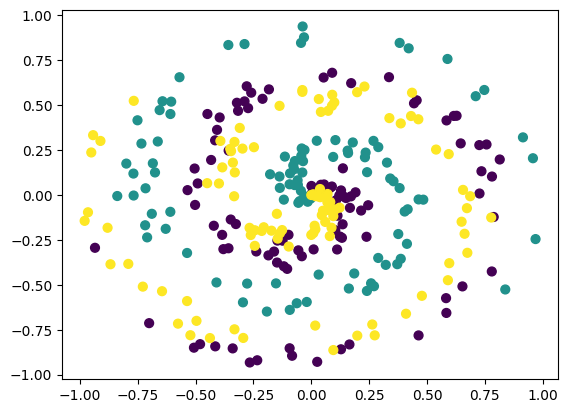

In [4]:
import matplotlib.pyplot as plt
x, y = spiral_data(samples=100, classes=3)
plt.scatter(x[:, 0], x[:, 1], c=y, s=40, cmap='viridis')
plt.show()

In [6]:
import numpy as np
import nnfs
nnfs.init()

print(np.random.randn(2,5))

[[ 1.7640524   0.4001572   0.978738    2.2408931   1.867558  ]
 [-0.9772779   0.95008844 -0.1513572  -0.10321885  0.41059852]]


In [7]:
print(np.zeros((2,5)))

[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]


In [8]:
import numpy as np
import nnfs
nnfs.init()
n_inputs = 2
n_neurons = 4
weights = 0.1 * np.random.randn(n_inputs, n_neurons)
biases = np.zeros((1, n_neurons))
print(weights)
print(biases)

[[ 0.17640524  0.04001572  0.0978738   0.22408931]
 [ 0.1867558  -0.09772779  0.09500884 -0.01513572]]
[[0. 0. 0. 0.]]


In [9]:
class Layer_Dense:
    def __init__(self, n_inputs, n_neurons):
        self.weights = 0.1 * np.random.randn(n_inputs, n_neurons)
        self.biases = np.zeros((1, n_neurons))

    def forward(self, inputs):
        self.output = np.dot(inputs, self.weights) + self.biases

In [10]:
X, y = spiral_data(samples=100, classes=3)
dense1 = Layer_Dense(2, 3)
dense1.forward(X)
print(dense1.output[:5])

[[ 0.          0.          0.        ]
 [ 0.00124927 -0.00113383 -0.00074443]
 [ 0.00247531 -0.00227871 -0.00149413]
 [ 0.00348339 -0.00217202 -0.00148696]
 [ 0.00506214 -0.00367756 -0.00247096]]


In [11]:
inputs = [0,2,-1,3.3,-2.7,1.1,2.2,-100]

output = []
for i in inputs:
    if i > 0:
        output.append(i)
    else:
        output.append(0)

print(output)

[0, 2, 0, 3.3, 0, 1.1, 2.2, 0]


In [12]:
import numpy as np
inputs = [0,2,-1,3.3,-2.7,1.1,2.2,-100]
output = np.maximum(0, inputs)
print(output)

[0.  2.  0.  3.3 0.  1.1 2.2 0. ]


In [13]:
class Activation_ReLU:
    def forward(self, inputs):
        self.output = np.maximum(0, inputs)

In [14]:
X,y = spiral_data(samples=100, classes=3)
dense1 = Layer_Dense(2, 5)
activation1 = Activation_ReLU()
dense1.forward(X)
activation1.forward(dense1.output)
print(activation1.output[:5])

[[0.         0.         0.         0.         0.        ]
 [0.         0.00073617 0.         0.         0.        ]
 [0.         0.00149142 0.         0.         0.        ]
 [0.         0.00221874 0.         0.         0.        ]
 [0.         0.00314131 0.         0.         0.0007574 ]]


In [16]:
layer_outputs = [4.8, 1.21, 2.385]
E = 2.71828182846
exp_values = []
for output in layer_outputs:
    exp_values.append(E ** output)
print('expontential values:', exp_values)

expontential values: [121.51041751893969, 3.3534846525504487, 10.85906266492961]


In [17]:
norm_base = sum(exp_values)
norm_values = []
for value in exp_values:
    norm_values.append(value / norm_base)
print('normalized values:', norm_values)
print('sum of normalized values:', sum(norm_values))

normalized values: [0.8952826639573506, 0.024708306782070668, 0.08000902926057876]
sum of normalized values: 1.0


In [18]:
import numpy as np
layer_outputs = [4.8, 1.21, 2.385]
exp_values = np.exp(layer_outputs)
print('expontential values:', exp_values)

expontential values: [121.51041752   3.35348465  10.85906266]


In [19]:
norm_values = exp_values / np.sum(exp_values)
print('normalized values:', norm_values)
print('sum of normalized values:', np.sum(norm_values))

normalized values: [0.89528266 0.02470831 0.08000903]
sum of normalized values: 0.9999999999999999


In [28]:
exp_values = np.exp(layer_outputs)

In [30]:
probabilities = exp_values / np.sum(exp_values,axis=0, keepdims=True)
print('probabilities:', probabilities)

probabilities: [0.89528266 0.02470831 0.08000903]


In [31]:
class Activation_Softmax:
    def forward(self, inputs):
        exp_values = np.exp(inputs - np.max(inputs, axis=1, keepdims=True))
        probabilities = exp_values / np.sum(exp_values, axis=1, keepdims=True)
        self.output = probabilities